<a href="https://colab.research.google.com/github/Madhuram2901/Machine_Learning_Projects/blob/main/MalwareAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# **Including Dataset**

In [ ]:
data_path = '/content/MalwareData.csv'

In [ ]:
data = pd.read_csv(data_path, sep = '|')
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
data.shape

(138047, 57)

In [ ]:
data.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
y = data['legitimate']
y

,legitimate
0,1
1,1
2,1
3,1
4,1
...,...
138042,0
138043,0
138044,0
138045,0


In [ ]:
data = data.drop(['Name'],axis=1)
data = data.drop(['md5'],axis=1)
data

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,332,224,258,11,0,205824,223744,0,123291,4096,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,332,224,33167,2,25,37888,185344,0,40000,4096,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,332,224,258,10,0,118272,380416,0,59610,4096,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,332,224,33166,2,25,49152,16896,0,51216,4096,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


# **Spillting into Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y , test_size = 0.2, random_state =42)

In [ ]:
X_train.shape

(110437, 55)

# **MODEL BUILDING**

## **Random Forest**

In [ ]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)

randomModel = clf.fit(X_train,y_train)
randomModel

RandomForestClassifier(max_depth=2, random_state=0)

### **Random forest Evaluation**

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,ConfusionMatrixDisplay,auc,confusion_matrix

**Prediction**

In [ ]:
train_pred = randomModel.predict(X_train)
accuracy_score(y_train,train_pred)

0.9924753479359273

In [ ]:
prediction = randomModel.predict(X_test)
accuracy_score(y_test,prediction)

0.9927562477363274

In [ ]:
f1_score(y_test,prediction)

0.9880023995200959

### **Confusion Matrix**

Confusion matrix, without Normalisation
[[19175    75]
 [  125  8235]]
Normalised Confusion Matrix
[[19175    75]
 [  125  8235]]


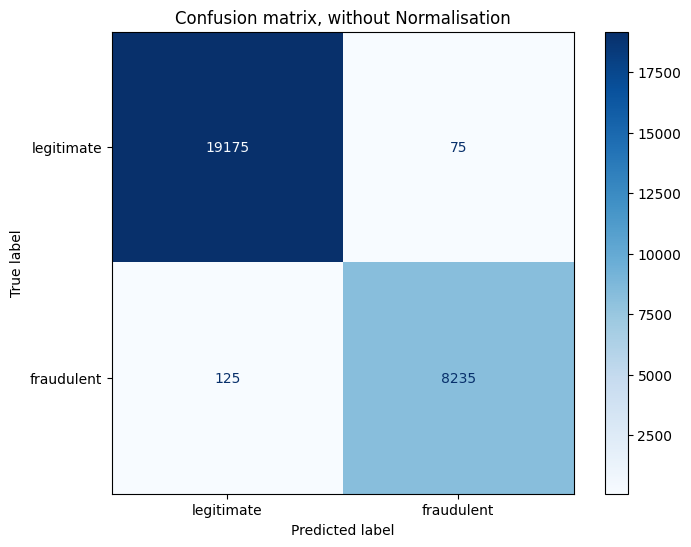

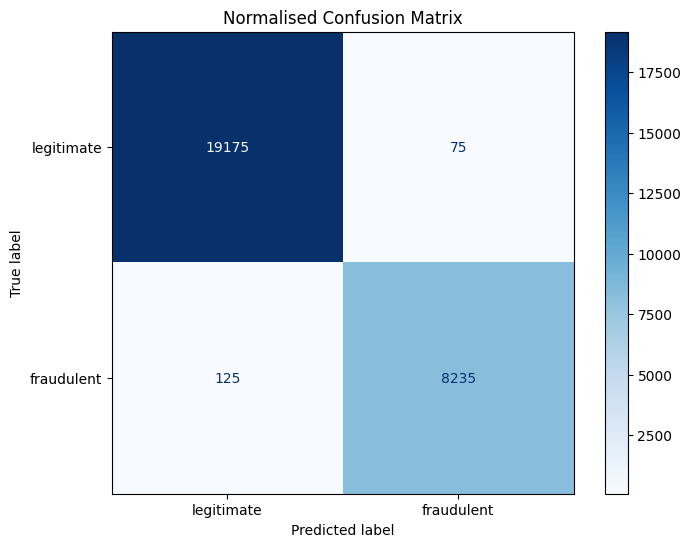

In [ ]:
titles_options = [("Confusion matrix, without Normalisation", None),
          ("Normalised Confusion Matrix", 'true')]

conf_matrix = confusion_matrix(y_test, randomModel.predict(X_test))
#Graph Representation(Matlab plot)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(conf_matrix,
                                  display_labels=['legitimate', 'fraudulent'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## **Logistic Regression**

In [ ]:
clf = LogisticRegression(random_state=0)
logModel = clf.fit(X_train,y_train)
clf

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### **Model Evaluation**

In [ ]:
train_log = logModel.predict(X_train)
accuracy_score(y_train, train_log)

0.9303132102465659

In [ ]:
pred = logModel.predict(X_test)
accuracy_score(y_test, pred)

0.9317276349148859

In [ ]:
f1_score(y_test, pred)

0.875223406367909

### **Confusion Matrix**

Confusion matrix, without Normalisation
[[19114   136]
 [ 1749  6611]]
Normalised Confusion Matrix
[[19114   136]
 [ 1749  6611]]


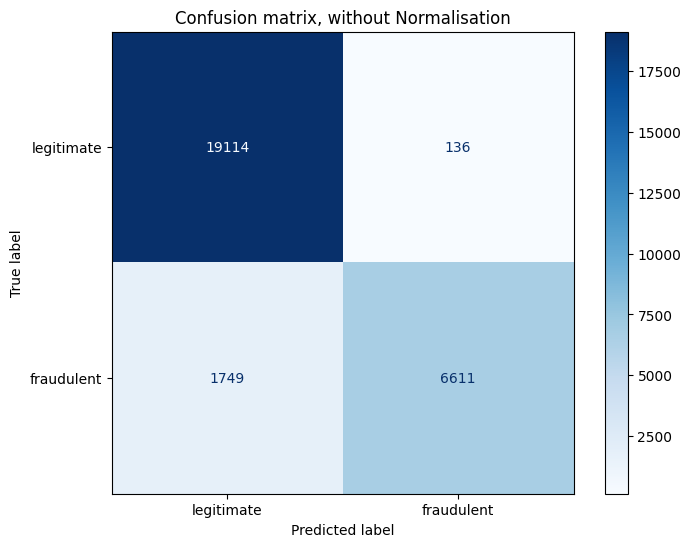

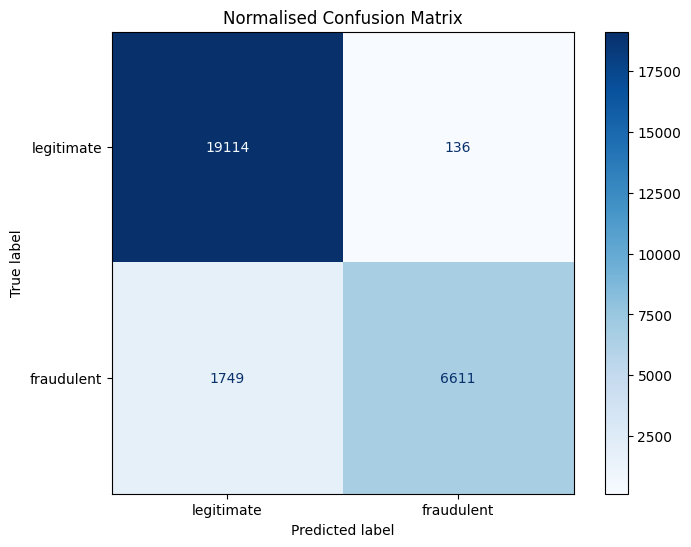

In [ ]:
titles_options = [("Confusion matrix, without Normalisation", None),
          ("Normalised Confusion Matrix", 'true')]

conf_matrix = confusion_matrix(y_test, logModel.predict(X_test))
#Graph Representation(Matlab plot)
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay(conf_matrix,
                                  display_labels=['legitimate', 'fraudulent'])
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=55, activation='relu'))
model.add(Dense(8, input_dim=55, activation='relu'))
model.add(Dense(4, input_dim=55, activation='relu'))
model.add(Dense(1, input_dim=55, activation='relu'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,073 (4.19 KB)

 Trainable params: 1,073 (4.19 KB)

 Non-trainable params: 0 (0.00 B)

### **Compling Model**

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6996 - loss: 4.8424
Epoch 2/5
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7017 - loss: 4.8086
Epoch 3/5
863/863 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7026 - loss: 4.7935
Epoch 4/5
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7007 - loss: 4.8238
Epoch 5/5
863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7001 - loss: 4.8342


### **Model Evaluation**

In [ ]:
trainPred = model.predict(X_train)
trainPred = [1 if y>0
             else 0
             for y in trainPred]
accuracy_score(y_train, trainPred)

3452/3452 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


0.7015221347917817

In [ ]:
y_pred = model.predict(X_test)
y_pred = [1 if y>0
             else 0
             for y in y_pred]
accuracy_score(y_test, y_pred)

863/863 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.6972111553784861

In [ ]:
confusion_matrix(y_test, y_pred)

array([[19250,     0],
       [ 8360,     0]])

In [ ]:
f1_score(y_test, y_pred)

0.0

# **Linear Regression**

In [ ]:
clf = LinearRegression()
linModel = clf.fit(X_train,y_train)
clf

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
train_lin = linModel.predict(X_train)
mse = mean_squared_error(y_train, train_lin)
mse

0.6092503056388122

In [ ]:
r2 = r2_score(y_train, train_lin)
r2

0.6092503056388122